In [83]:
from google.colab import files
upload = files.upload()

Saving diabetes.csv to diabetes (2).csv


# **Data Pre-processing**

Importing Libraries and dataset

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Step 2:** Checking Missing values in the data

In [87]:
print(df.shape)
df.isnull().sum()

(768, 9)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Step 3:** Encoding categorical variables
Since,The dataset has no categorical variables as all the variables are int and float data types and no object data type found.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

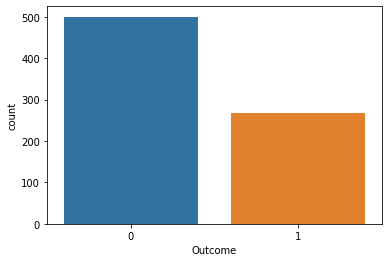

In [90]:
sns.countplot(df['Outcome'],label = 'count')

In [91]:
df.iloc[:,0:9].corr().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


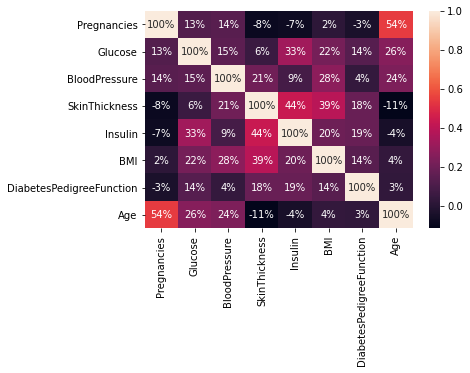

In [92]:
plt.figure()
sns.heatmap(df.iloc[:,0:8].corr(),annot=True,fmt='.0%')

**Step 4:** Spliting the dataset

In [93]:
# defining independent and dependent variables
X = df.iloc[:,0:8].values
Y = df['Outcome'].values

In [94]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

**Step 5:** Feature Scaling

In [95]:
# Scaling the values of train and test set
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## **Model Selection**
The logistic regression, decision tree, random forest and neural networking models are trained and tested and the model with good accuracy is selected.

In [96]:
def models(x_train,y_train):
  #logistic
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(x_train,y_train)

  #Decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(x_train,y_train)

  #rf
  from sklearn.ensemble import RandomForestClassifier
  rf= RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  rf.fit(x_train,y_train)

  #print the model accuracy
  print('[0] Logistic accuracy:',log.score(x_train,y_train))
  print('[1] Decision Tree accuracy:',tree.score(x_train,y_train))
  print('[2] random forest accuracy:',rf.score(x_train,y_train))
  return log,tree,rf

Accuracy of train data for the above models.

In [97]:
model=models(x_train, y_train)

[0] Logistic accuracy: 0.762214983713355
[1] Decision Tree accuracy: 1.0
[2] random forest accuracy: 0.9820846905537459


Here, decision tree model and random forest shows overfitting of accuracy as they are less than or equal to 1. So, we continue further with the logistic model.

# **Logistic Regression model**


In [98]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting Test results for the model

In [103]:
y_pred_log = log.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred_log),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

**Model Evaluation**

In [104]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

***accuracy_score:*** In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [105]:
# Accuracy Score fore test data
accuracy_score(y_pred_log,y_test)

0.7987012987012987

***F1 score*** can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 
The formula for the F1 score is:

> F1 = 2 * (precision * recall) / (precision + recall) 

In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

In [106]:
# F1 score for test data
f1_score(y_pred_log,y_test)

0.651685393258427

***A confusion matrix*** is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class.

In [107]:
# Confusion matrix
confusion_matrix(y_pred_log,y_test)

array([[94, 18],
       [13, 29]])

# **Neural Network Model**

**Neural Network**
 has four activation layers: Sigmoid, Relu, Leaky relu, Softmax.
The Input layer < Hidden layer < Output layer.



In [108]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [109]:

neural_model=Sequential()
neural_model.add(Dense(16,input_dim=8,activation='relu'))
neural_model.add(Dropout(0.2))
neural_model.add(Dense(32,activation='relu'))
neural_model.add(Dropout(0.2))
neural_model.add(Dense(64,activation='relu'))
neural_model.add(Dropout(0.2))
neural_model.add(Dense(1,activation='sigmoid'))


Stochastic gradient descent termed as ***adam*** is the most commonly used optimizer while building a neural network model. 

Dependent variable is categorical with two classification values 0 and 1. Hence, ***binary_crossentrop***y loss function is used.

In [110]:
neural_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [111]:
neural_model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5782
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.6531
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.6954
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5710 - accuracy: 0.7036
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5411 - accuracy: 0.7182
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5260 - accuracy: 0.7427
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5251 - accuracy: 0.7410
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7410
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7459
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.7362
Epoch 11/

Predicting the test results and evaluating the model

If predicted output has prob value greater than 0.5 are assigned 1(person has diabetes) else 0.

In [112]:
y_pred_nn = neural_model.predict(x_test)
y_pred_nn = (y_pred_nn > 0.5)
print(np.concatenate((y_pred_nn.reshape(len(y_pred_nn),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

Making the confusion matrix

In [113]:
cm = confusion_matrix(y_test, y_pred_nn)
print(cm)
accuracy_score(y_test, y_pred_nn)

[[95 12]
 [17 30]]


0.8116883116883117

**Accuracy score of both the models on the test data.**

In [115]:
print('Accuracy score of logistic regression model:',accuracy_score(y_pred_log,y_test))
print('Accuracy score of Neural Network model:',accuracy_score(y_pred_nn,y_test))


Accuracy score of logistic regression model: 0.7987012987012987
Accuracy score of Neural Network model: 0.8116883116883117
